### Классификация
# Задача
Бинарная классификация переменной review_score (отрицательный или положительный отзыв будет оставлен на товар)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем таблицы

In [63]:
orders = pd.read_csv("../dataset/olist_orders_dataset.csv")
order_items = pd.read_csv("../dataset/olist_order_items_dataset.csv")
customers = pd.read_csv("../dataset/olist_customers_dataset.csv")
products = pd.read_csv("../dataset/olist_products_dataset.csv")
sellers = pd.read_csv("../dataset/olist_sellers_dataset.csv")
order_reviews = pd.read_csv("../dataset/olist_order_reviews_dataset.csv")
order_payments = pd.read_csv("../dataset/olist_order_payments_dataset.csv")
product_translation = pd.read_csv("../dataset/product_category_name_translation.csv")

Перевод названий продуктов на английский

In [64]:
products = products.merge(product_translation, on='product_category_name', how='left')

Объединяем таблицы

In [65]:
order_items_full = order_items.merge(products, on='product_id', how='left')
order_items_full = order_items_full.merge(sellers, on='seller_id', how='left')

In [66]:
orders_full = orders.merge(order_items_full, on='order_id', how='left')
orders_full = orders_full.merge(customers, on='customer_id', how='left')
orders_full = orders_full.merge(order_reviews[['order_id','review_score']], on='order_id', how='left')

In [67]:
payments_agg = order_payments.groupby('order_id').agg({
    'payment_value':'sum',
    'payment_type': lambda x: x.mode()[0]
}).reset_index()
orders_full = orders_full.merge(payments_agg, on='order_id', how='left')

Создаём целевую переменную

In [68]:
orders_full['target'] = np.where(orders_full['review_score'] >= 4, 1, 0)

In [69]:
print(orders_full.shape)
orders_full.head()

(114092, 34)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,payment_value,payment_type,target
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0,38.71,voucher,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0,141.46,boleto,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0,179.12,credit_card,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0,72.20,credit_card,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0,28.62,credit_card,1


In [70]:
orders_full.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
seller_zip_code_prefix           float64
seller_city     

Удаление дубликатов

In [71]:
duplicate_rows = orders_full[orders_full.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (401, 34)


In [72]:
orders_full =orders_full.drop_duplicates()
orders_full.count()

order_id                         113691
customer_id                      113691
order_status                     113691
order_purchase_timestamp         113691
order_approved_at                113530
order_delivered_carrier_date     111715
order_delivered_customer_date    110448
order_estimated_delivery_date    113691
order_item_id                    112915
product_id                       112915
seller_id                        112915
shipping_limit_date              112915
price                            112915
freight_value                    112915
product_category_name            111308
product_name_lenght              111308
product_description_lenght       111308
product_photos_qty               111308
product_weight_g                 112897
product_length_cm                112897
product_height_cm                112897
product_width_cm                 112897
product_category_name_english    111284
seller_zip_code_prefix           112915
seller_city                      112915


Удаление пропусков

In [73]:
print(orders_full.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1976
order_delivered_customer_date    3243
order_estimated_delivery_date       0
order_item_id                     776
product_id                        776
seller_id                         776
shipping_limit_date               776
price                             776
freight_value                     776
product_category_name            2383
product_name_lenght              2383
product_description_lenght       2383
product_photos_qty               2383
product_weight_g                  794
product_length_cm                 794
product_height_cm                 794
product_width_cm                  794
product_category_name_english    2407
seller_zip_code_prefix            776
seller_city                       776
seller_state                      776
customer_uni

In [74]:
num_features = orders_full.select_dtypes(include=[np.number]).columns.tolist()
cat_features = orders_full.select_dtypes(include=['object']).columns.tolist()

orders_full[num_features] = orders_full[num_features].fillna(orders_full[num_features].median())
orders_full[cat_features] = orders_full[cat_features].fillna('Unknown')

In [75]:
print(orders_full.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

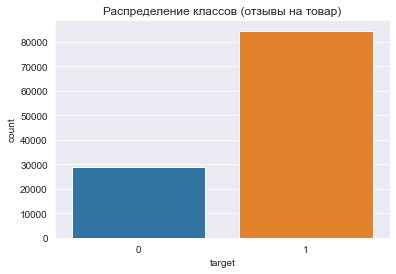

In [76]:
sns.countplot(x='target', data=orders_full)
plt.title('Распределение классов (отзывы на товар)')
plt.show()

Классы не сбалансированы. Для некоторых моделей придётся применять балансировку

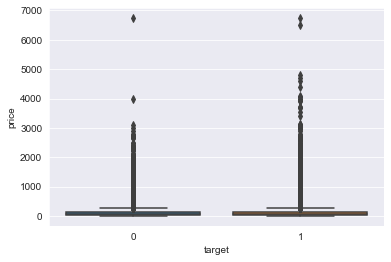

In [77]:
sns.boxplot(x='target', y='price', data=orders_full)
plt.show()

Цена товара не сильно влияет на оценку товара. Выбросы есть (дорогие товары)

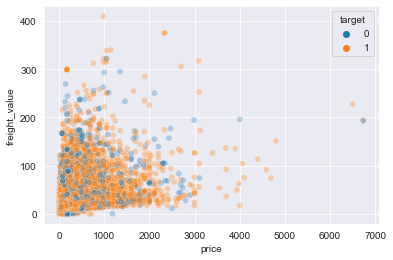

In [78]:
sns.scatterplot(x='price', y='freight_value', hue='target', data=orders_full, alpha=0.3)
plt.show()

Цена товара и стоимость доставки связаны между собой, но не сильно влияют на отзыв о товаре

Тепловая карта

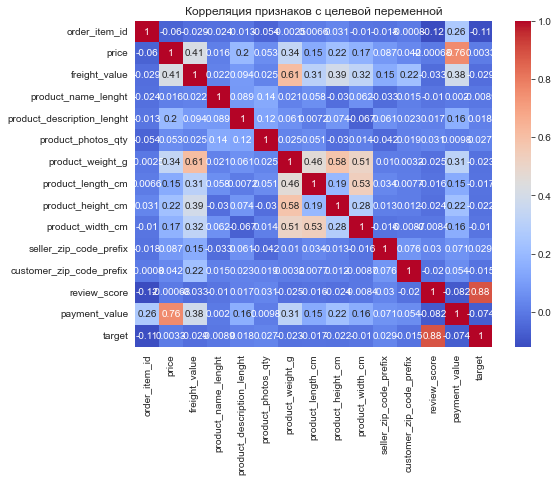

In [79]:
corr = orders_full[num_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков с целевой переменной")
plt.show()

Гистограммы числовых признаков

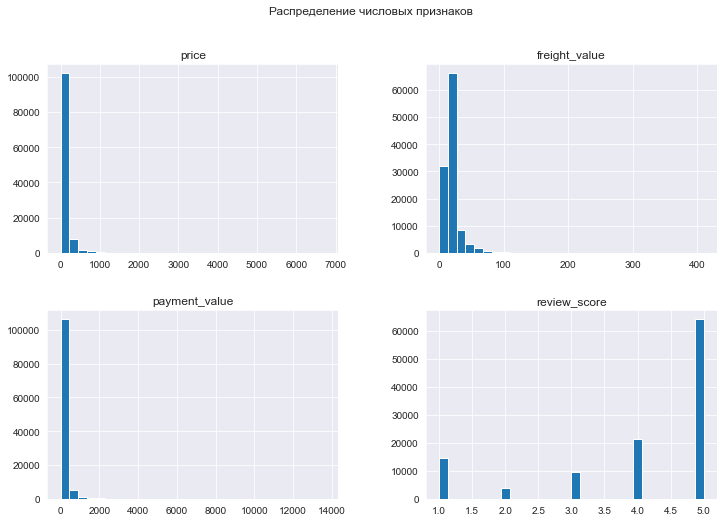

In [80]:
num_features = ['price', 'freight_value', 'payment_value', 'review_score']

orders_full[num_features].hist(bins=30, figsize=(12,8))
plt.suptitle("Распределение числовых признаков")
plt.show()

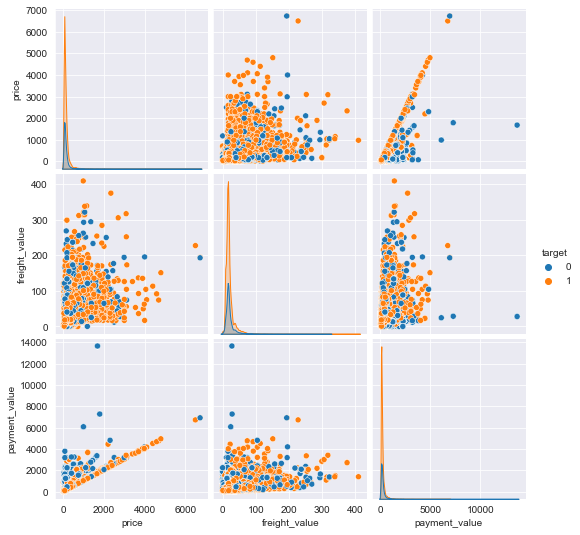

In [81]:
sns.pairplot(orders_full[['price', 'freight_value', 'payment_value', 'target']], hue='target', diag_kind='kde')
plt.show()

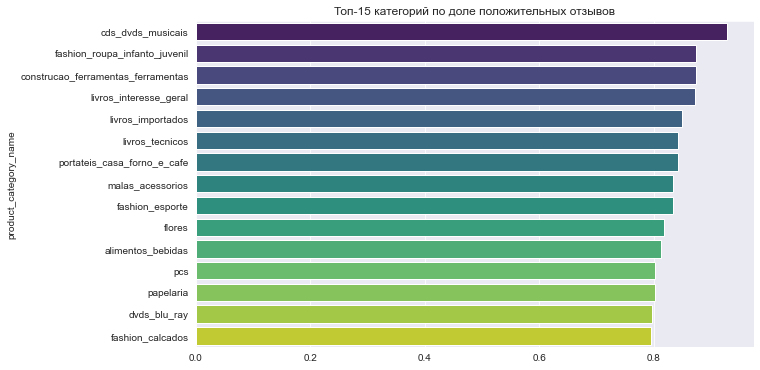

In [82]:
avg_score = orders_full.groupby('product_category_name')['target'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_score.values, y=avg_score.index, palette="viridis")
plt.title("Топ-15 категорий по доле положительных отзывов")
plt.show()

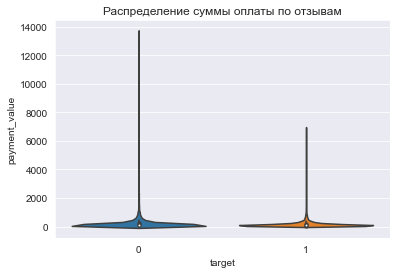

In [83]:
sns.violinplot(x='target', y='payment_value', data=orders_full, scale='width')
plt.title("Распределение суммы оплаты по отзывам")
plt.show()

Выбираем признаки

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


num_features = [
    'price', 'freight_value', 'payment_value',
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]

cat_features = ['payment_type', 'product_category_name_english', 'seller_state', 'customer_state']

Кодируем категориальные признаки

In [85]:
for col in cat_features:
    le = LabelEncoder()
    orders_full[col] = le.fit_transform(orders_full[col])

Масштабируем числовые признаки

In [86]:
scaler = StandardScaler()
orders_full[num_features] = scaler.fit_transform(orders_full[num_features])

In [87]:
X = orders_full[num_features + cat_features]
y = orders_full['target']

Разбиваем на тестовую и тренировочную выборки

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### K-ближайших соседей (KNN)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

Базовая модель

In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Предсказания

In [91]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

In [92]:
print("Базовый KNN")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Базовый KNN
              precision    recall  f1-score   support

           0       0.49      0.27      0.35      5817
           1       0.78      0.90      0.84     16922

    accuracy                           0.74     22739
   macro avg       0.63      0.59      0.59     22739
weighted avg       0.71      0.74      0.71     22739

ROC-AUC: 0.6343919101601728


Подбор параметров

In [93]:
param_grid = {
    'n_neighbors': range(5, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [94]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'distance'}


Лучшая модель

In [95]:
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)
y_proba_best = best_knn.predict_proba(X_test)[:, 1]

print("KNN после подбора параметров")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))

KNN после подбора параметров
              precision    recall  f1-score   support

           0       0.62      0.29      0.40      5817
           1       0.79      0.94      0.86     16922

    accuracy                           0.77     22739
   macro avg       0.71      0.62      0.63     22739
weighted avg       0.75      0.77      0.74     22739

ROC-AUC: 0.6973086852991337


Матрица ошибок

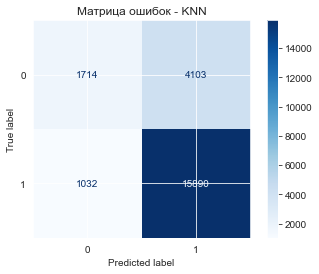

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap="Blues")
plt.title("Матрица ошибок - KNN")
plt.show()

ROC-кривая

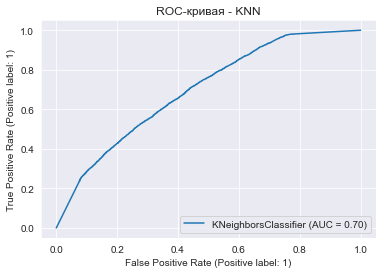

In [97]:
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("ROC-кривая - KNN")
plt.show()

Precision-Recall кривая

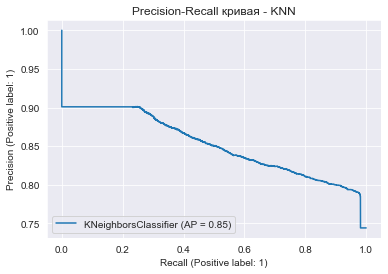

In [98]:
PrecisionRecallDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("Precision-Recall кривая - KNN")
plt.show()